## Model Training

### 1.1 Import Data and Required Package

##### Importing Pandas, Mumpy, Matplotlib, Seaborn and Warings Library.

In [1]:

# basic import
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


#### Import the CSV Data as Pandas DataFrame

In [2]:
df= pd.read_csv('d:\\DataScience\\mlproject\\Notebook\\data\\stud.csv')
#import os
#os.getcwd()

### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,high school,standard,none,74,57,62
1,male,group E,master's degree,free/reduced,completed,66,70,70
2,female,group C,high school,free/reduced,completed,40,54,47
3,male,group B,bachelor's degree,free/reduced,none,81,83,79
4,male,group C,bachelor's degree,standard,completed,74,69,75


### Reparing X and Y variables

In [4]:
x= df.drop(columns=['math score'],axis=1)

In [5]:
y=df['math score']

In [6]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group E,high school,standard,none,57,62
1,male,group E,master's degree,free/reduced,completed,70,70
2,female,group C,high school,free/reduced,completed,54,47
3,male,group B,bachelor's degree,free/reduced,none,83,79
4,male,group C,bachelor's degree,standard,completed,69,75


In [7]:
y

0      74
1      66
2      40
3      81
4      74
       ..
995    67
996    58
997    72
998    95
999    61
Name: math score, Length: 1000, dtype: int64

In [8]:
num_features= x.select_dtypes(exclude='object').columns
cat_features= x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer =StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(

    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler',numeric_transformer,num_features)

    ]
)


In [9]:
x=preprocessor.fit_transform(x)

In [10]:
x.shape

(1000, 19)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae= mean_absolute_error(true, predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_square=r2_score(true,predicted)
    return mae, rmse, r2_square


In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) #train model

    # Make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error:5.2722
- Mean Absolute Error: 4.1256
- R2 Score: 0.8976


Lasso
Model performance for Training set
- Root Mean Squared Error:6.6675
- Mean Absolute Error: 5.4922
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error:5.2695
- Mean Absolute Error: 4.1373
- R2 Score: 0.8969


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error:5.7383
- Mean Absolute Error: 5.9340
- R2 Score: 0.7999


Decision Tree
Model performance for Training set
- Root Mean Squared Error:0.2704
- Mean Absolute Error: 6.2300
- R2 Score: 0.7590


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error:2.2260
- Mean Absolute Error: 4.5663
- R2 Score: 0.8755


XGBRegressor
Model performance for Training set
- Root Mean Squared Error:0.9998
- Mean Absolute Error: 4.7065
- R2 Score: 0.8639


CatBoosting Regressor
Model performance for Training set
- Root 

### Results

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.897638
2,Ridge,0.896920
7,CatBoosting Regressor,0.885683
5,Random Forest Regressor,0.875459
6,XGBRegressor,0.863889
8,AdaBoost Regressor,0.863501
1,Lasso,0.825394
3,K-Neighbors Regressor,0.799914
4,Decision Tree,0.758975


## Linear Regression

In [15]:
lin_model= LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred= lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.76


## Plot y_pred and y_test

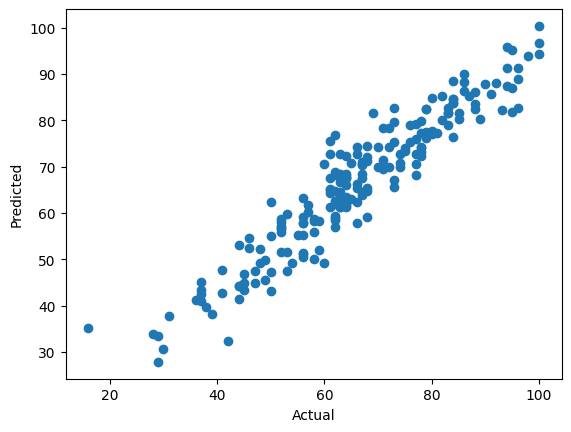

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [17]:
import matplotlib.pyplot
#getattr(matplotlib,attrs[i])
#print(dir(matplotlib.pyplot))

<Axes: xlabel='math score'>

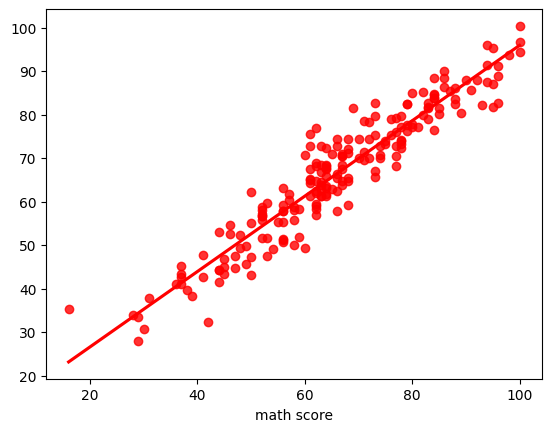

In [18]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

#### Difference between Actual and Predicted Values

In [19]:
pred_df= pd.DataFrame({'Actual Value': y_test, 'Predicated Value':y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicated Value,Difference
521,75,73.96875,1.03125
737,62,76.87500,-14.87500
740,50,47.15625,2.84375
660,64,72.34375,-8.34375
411,84,76.34375,7.65625
...,...,...,...
408,68,71.12500,-3.12500
332,76,75.31250,0.68750
208,78,74.21875,3.78125
613,63,62.62500,0.37500
